# bitacora para analizar archivos ab1
tomado de 
http://biopython.org/wiki/ABI_traces

In [1]:
from Bio import SeqIO, SeqRecord
from Bio.Alphabet import IUPAC
from abifpy import Trace
from collections import defaultdict
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [2]:
def graficado(x1,x2):
    plt.figure(figsize=(16,4))
    plt.plot(trace['DATA9'], color='blue')
    plt.plot(trace['DATA10'], color='red')
    plt.plot(trace['DATA11'], color='green')
    plt.plot(trace['DATA12'], color='yellow')
    plt.xlim(x1,x2)  # se utiliza valores de 1000 como maximo
    plt.show()

### cambiar al directorio en donde estan las secuencias
En este caso `../data/ab2`

In [3]:
cd ../data/ab2

/home/user30/Desktop/data/ab2


In [4]:
ls

Nav1.2F.ab1*  PET1.2F.ab1*  PET2.8F.ab1*    PHBb1.2F.ab1*
Nav1.8F.ab1*  PET1.8F.ab1*  PETsn1.2F.ab1*  secuencias_ab1.fasta
Nav2.2F.ab1*  PET2.2F.ab1*  PETsn1.8F.ab1*


In [5]:
import os

In [6]:
lista = os.listdir(path ="./")
lista

['Nav1.2F.ab1',
 'Nav1.8F.ab1',
 'Nav2.2F.ab1',
 'PET1.2F.ab1',
 'PET1.8F.ab1',
 'PET2.2F.ab1',
 'PET2.8F.ab1',
 'PETsn1.2F.ab1',
 'PETsn1.8F.ab1',
 'PHBb1.2F.ab1',
 'secuencias_ab1.fasta']

In [7]:
intervalos = range(1000,6000,1000)
intervalos

range(1000, 6000, 1000)

1.- Graficando archivo: Nav1.2F.ab1


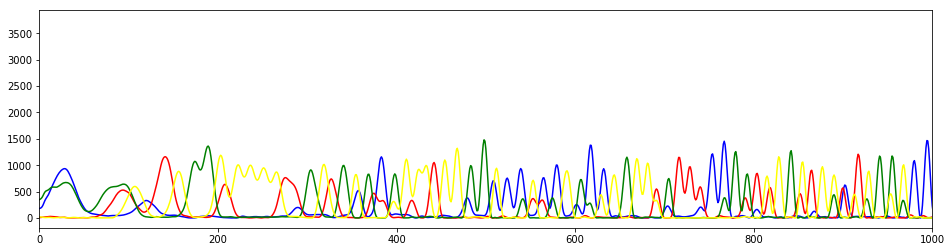

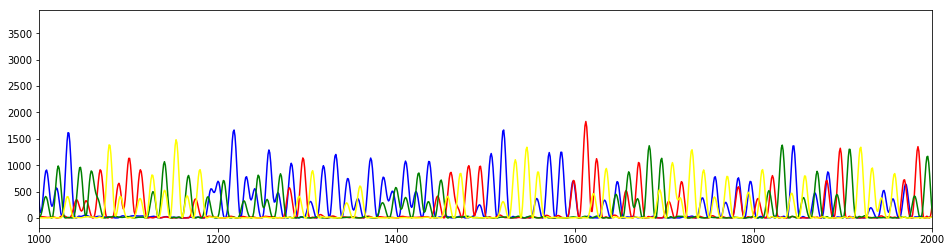

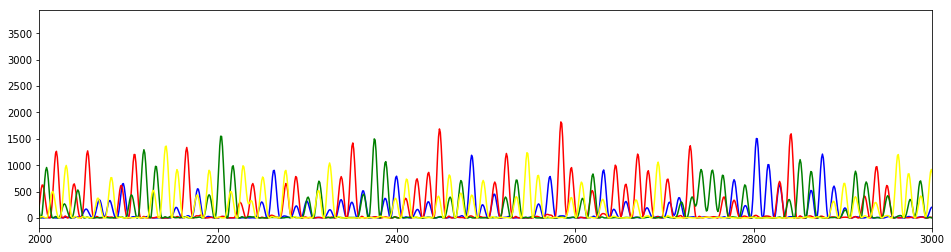

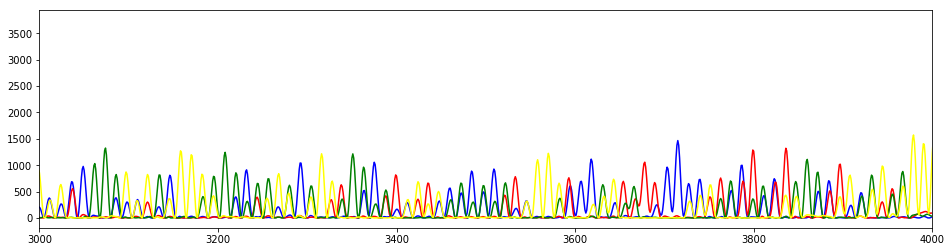

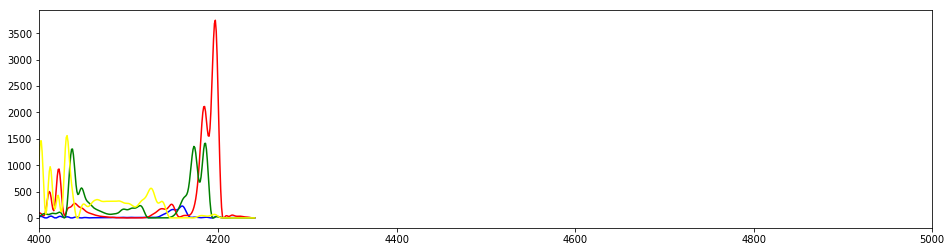

 
2.- Graficando archivo: Nav1.8F.ab1


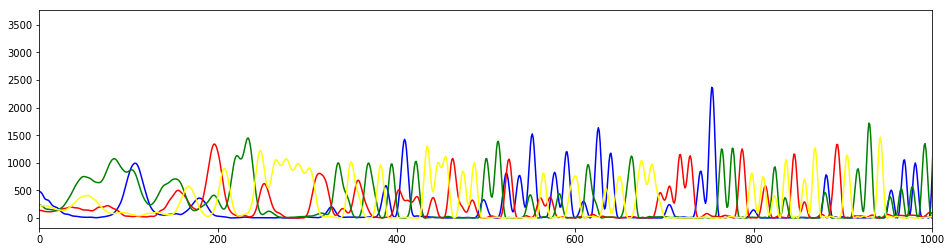

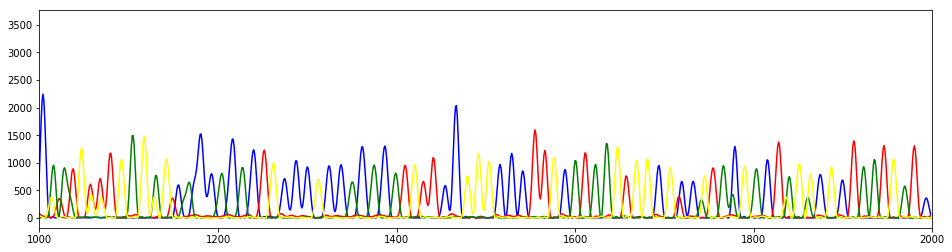

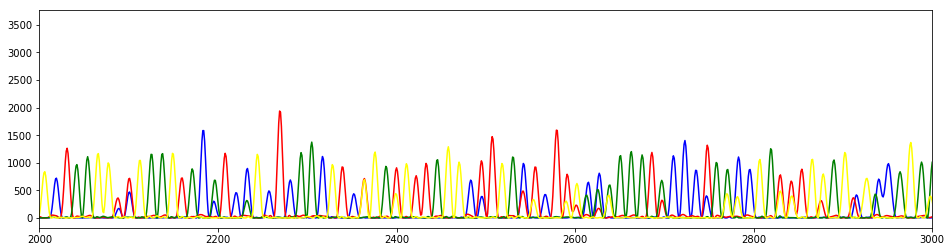

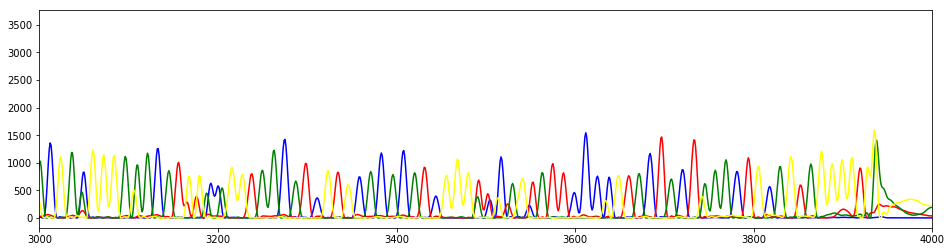

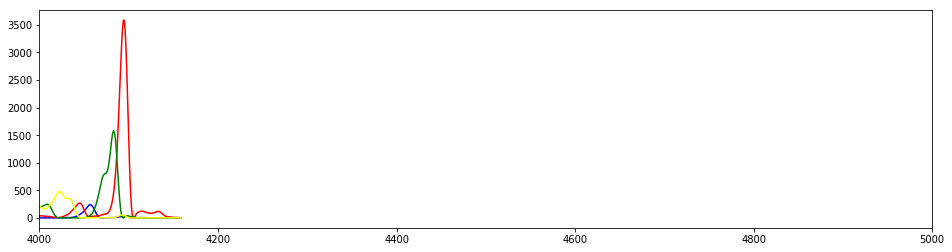

 
3.- Graficando archivo: Nav2.2F.ab1


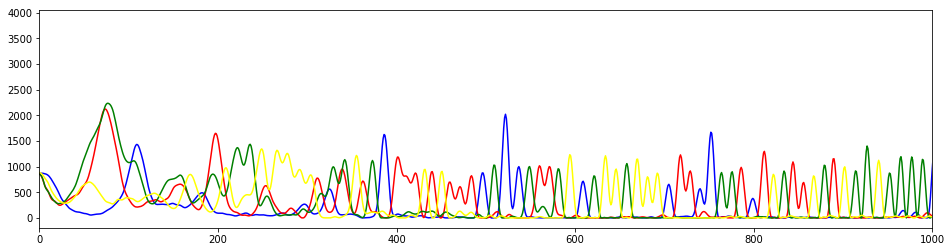

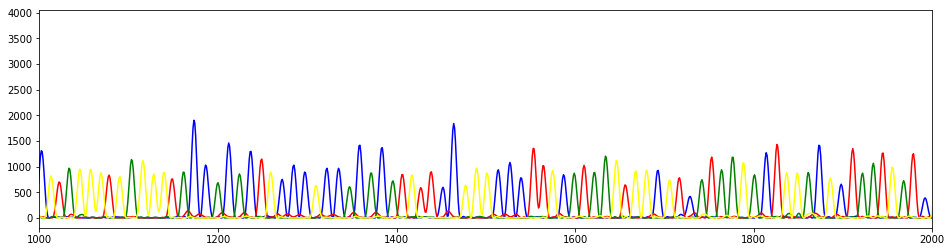

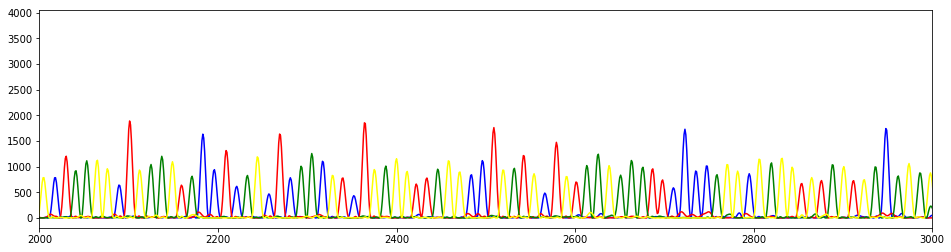

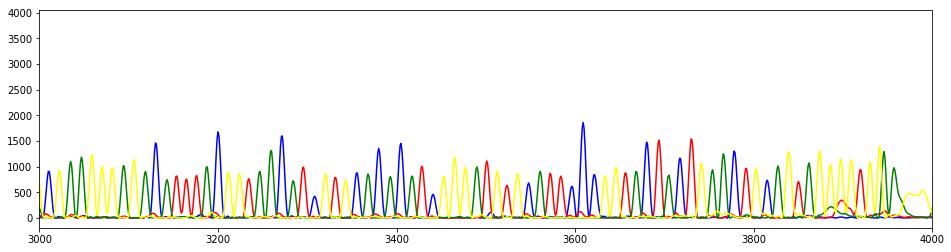

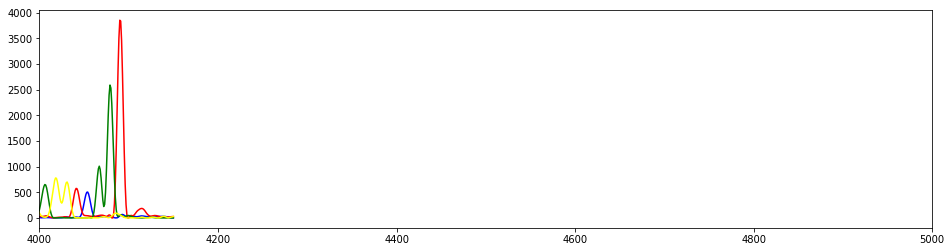

 
4.- Graficando archivo: PET1.2F.ab1


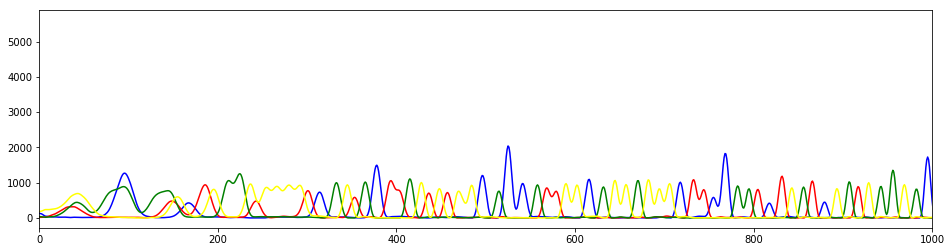

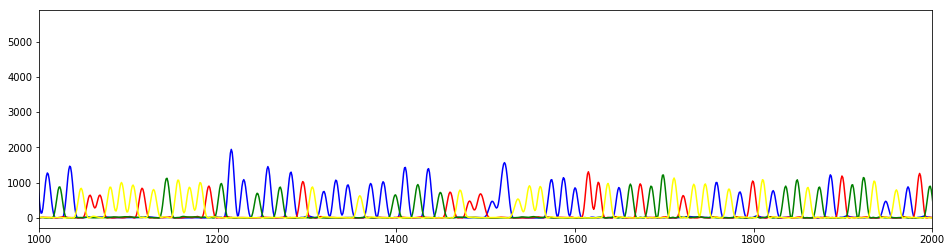

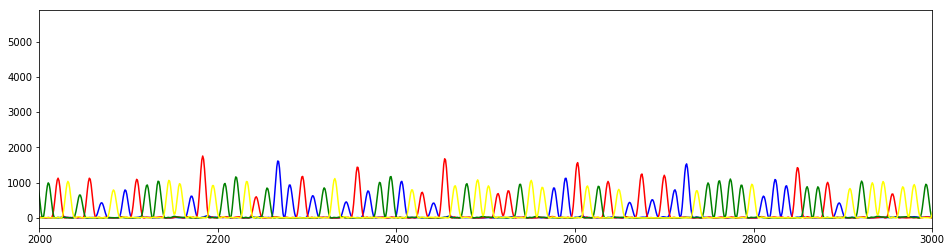

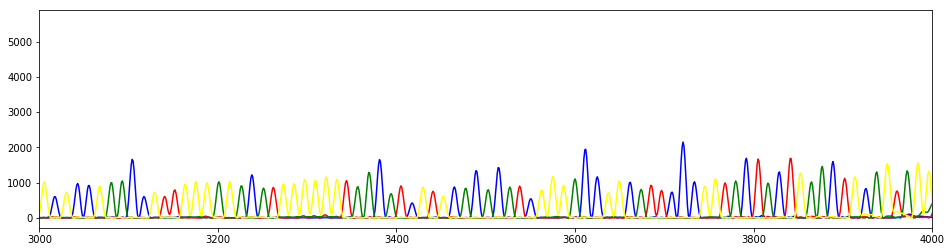

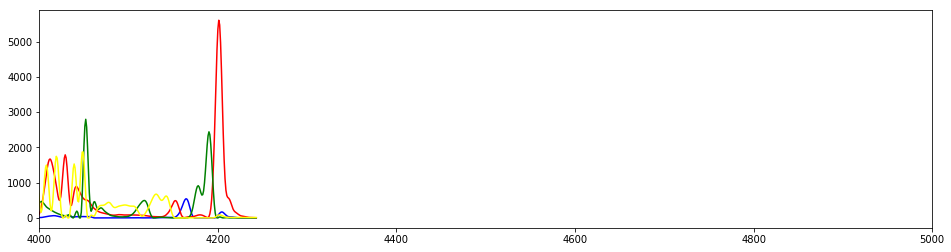

 
5.- Graficando archivo: PET1.8F.ab1


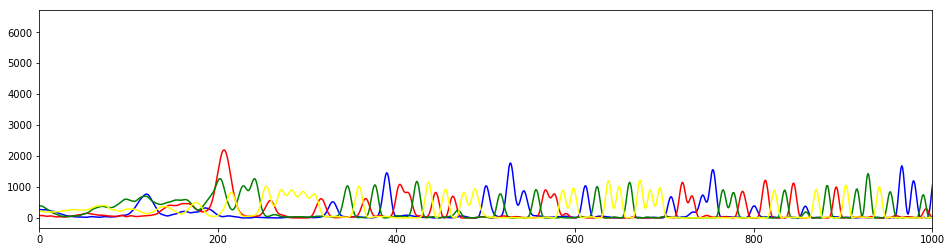

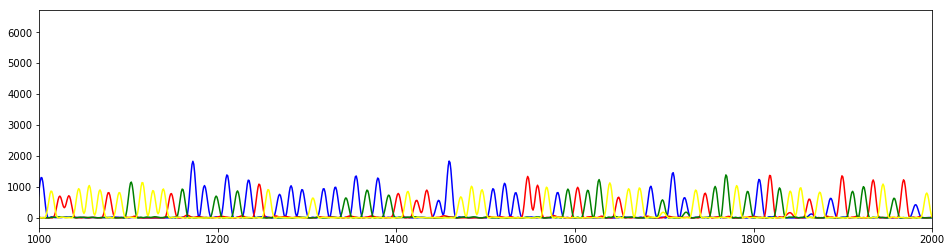

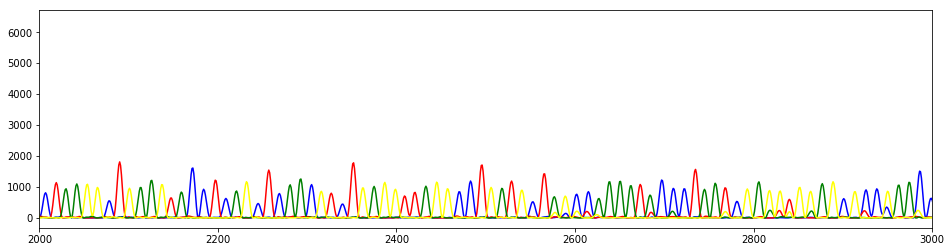

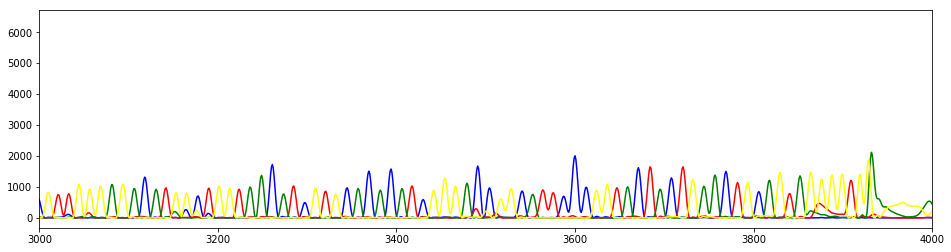

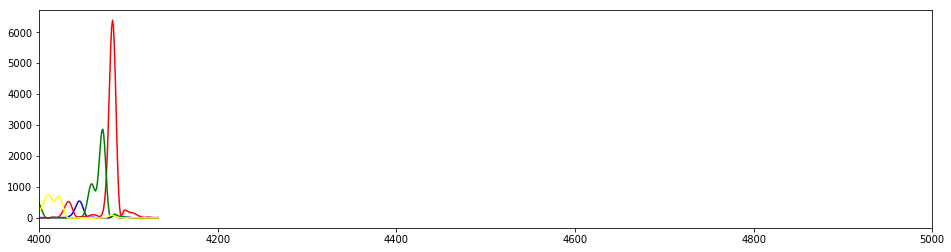

 
6.- Graficando archivo: PET2.2F.ab1


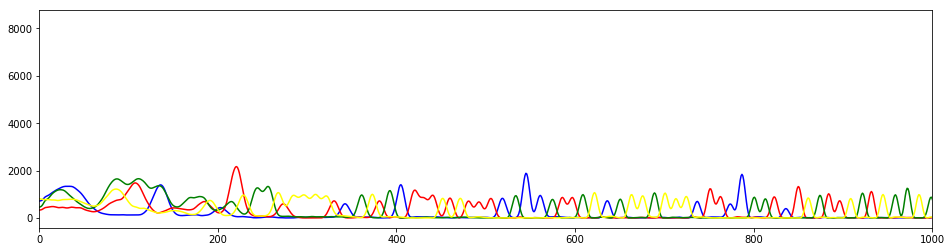

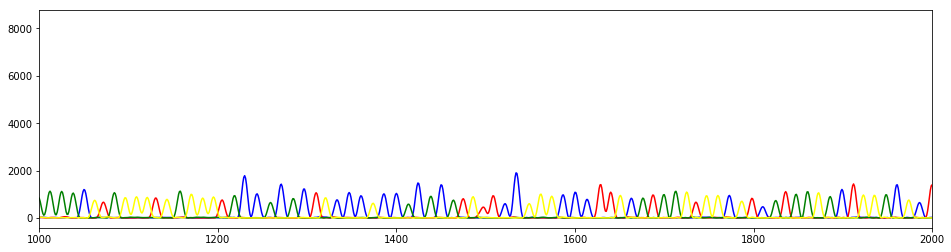

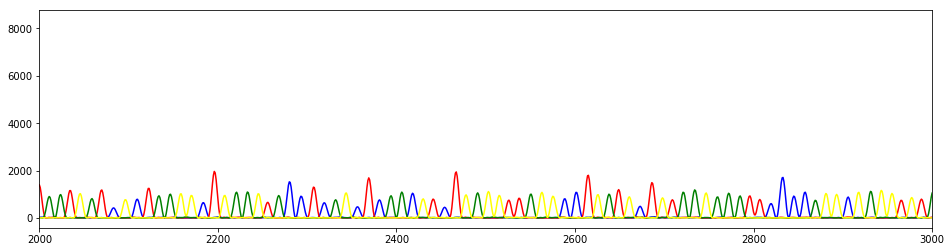

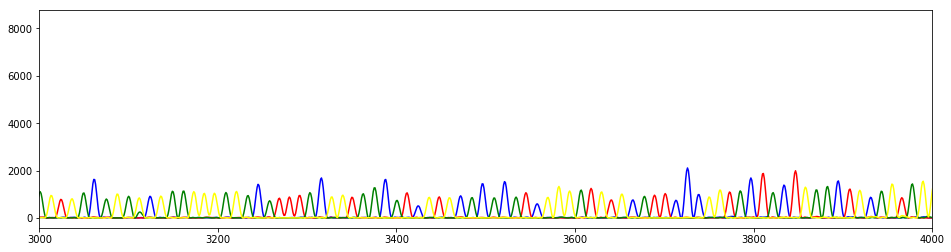

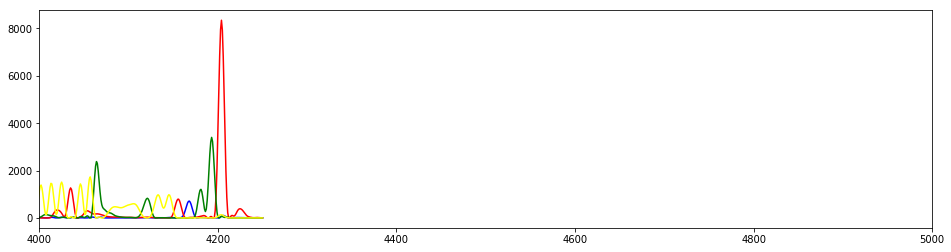

 
7.- Graficando archivo: PET2.8F.ab1


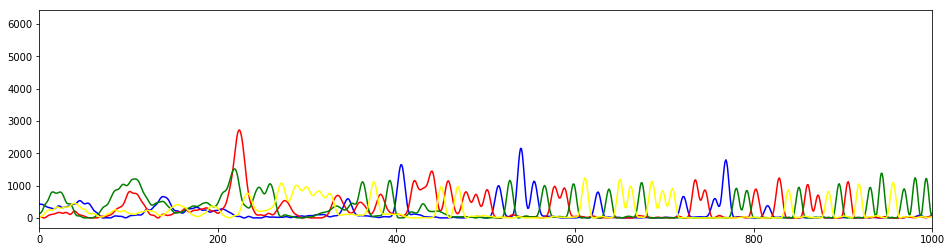

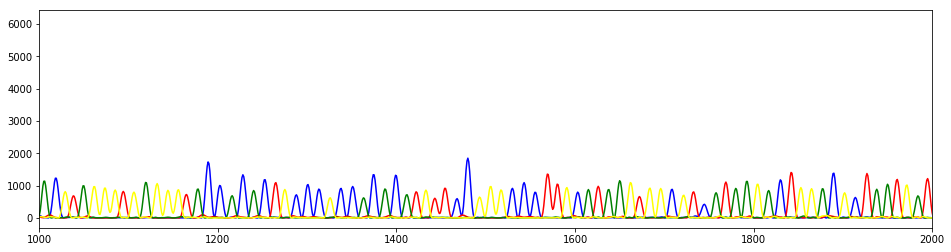

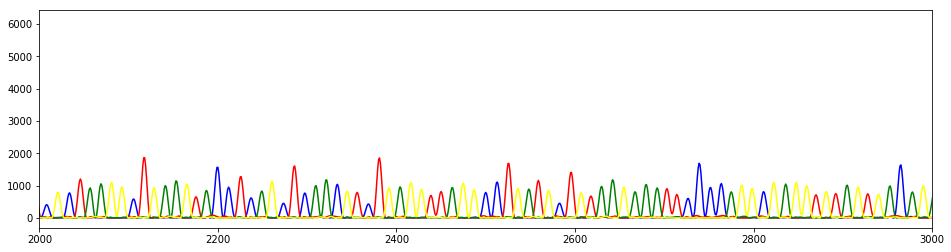

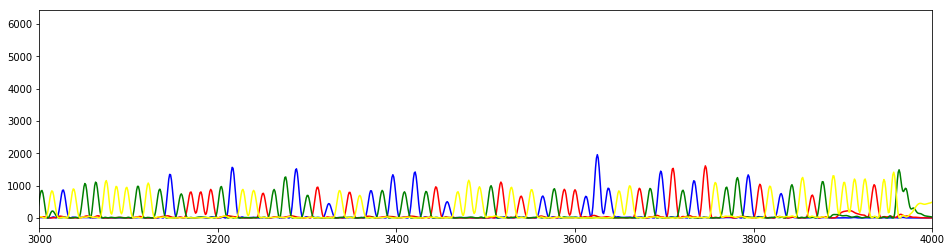

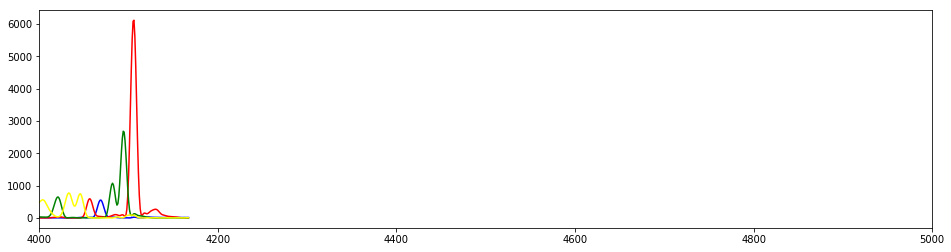

 
8.- Graficando archivo: PETsn1.2F.ab1


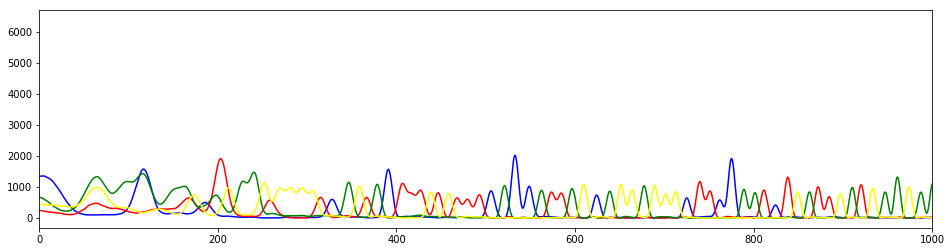

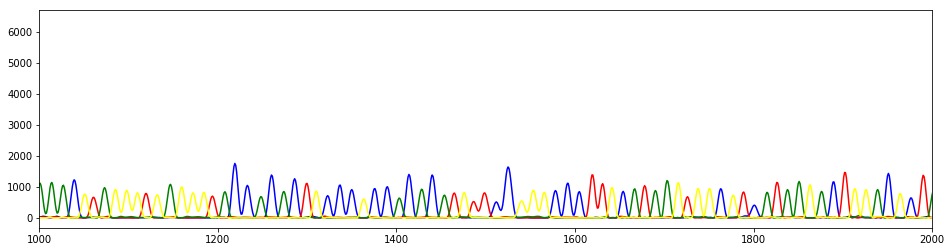

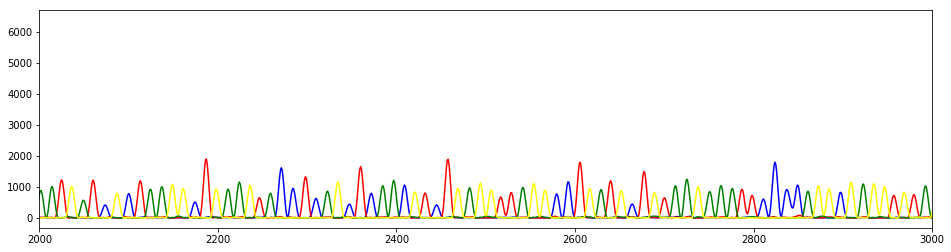

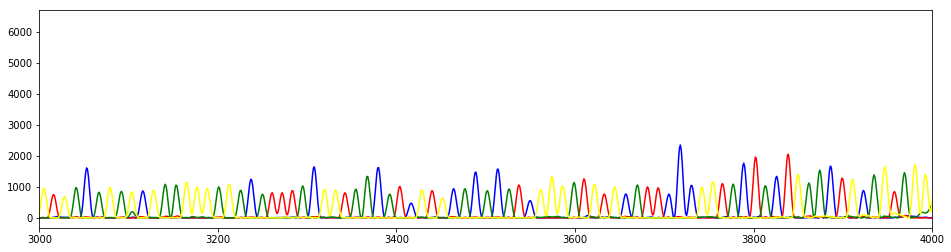

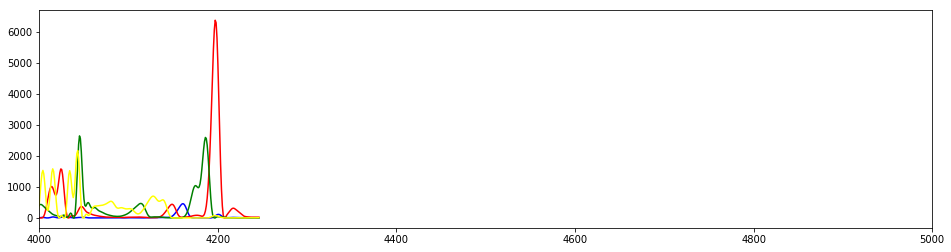

 
9.- Graficando archivo: PETsn1.8F.ab1


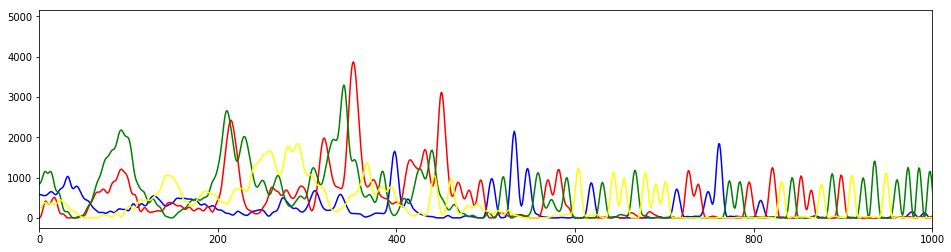

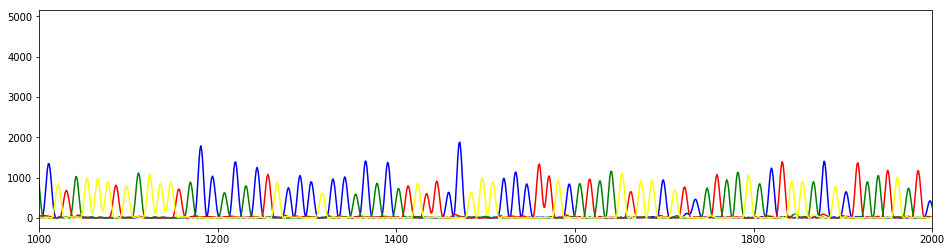

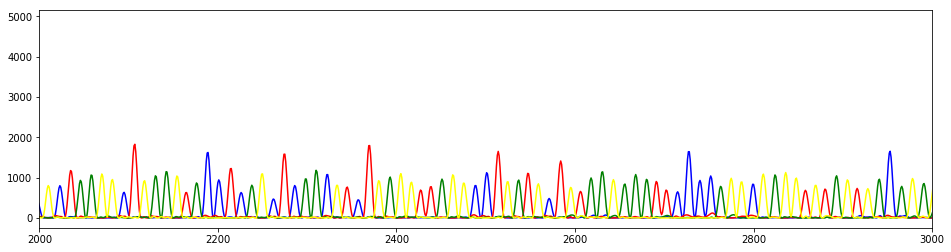

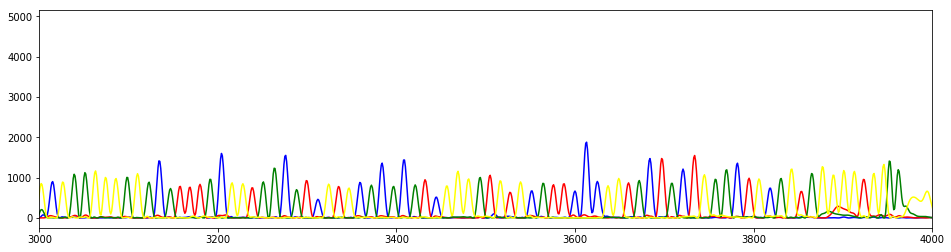

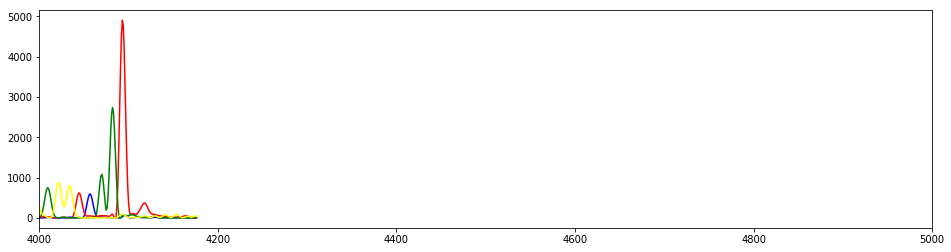

 
10.- Graficando archivo: PHBb1.2F.ab1


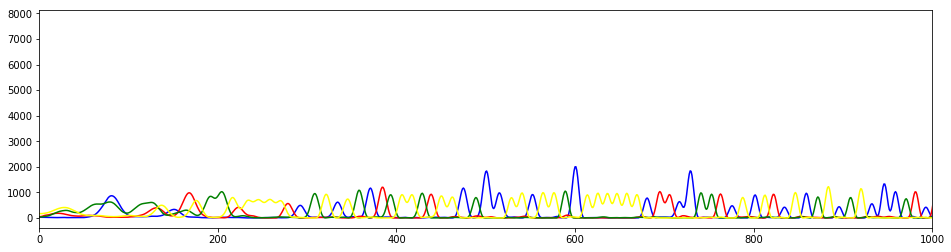

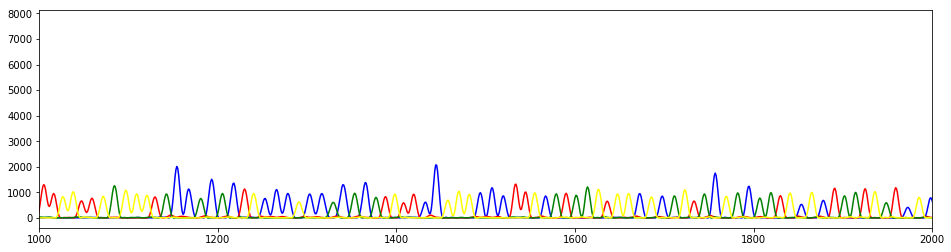

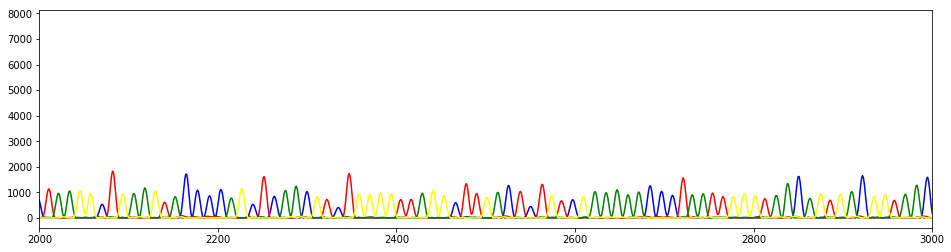

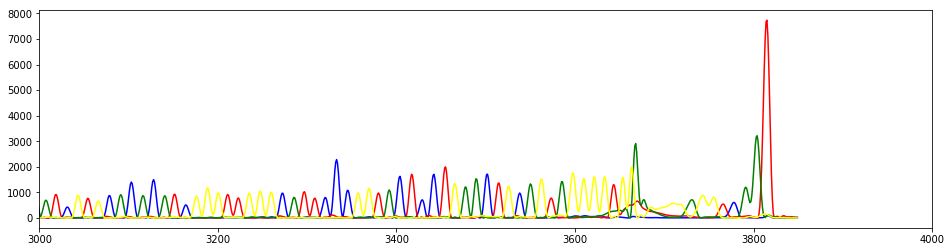

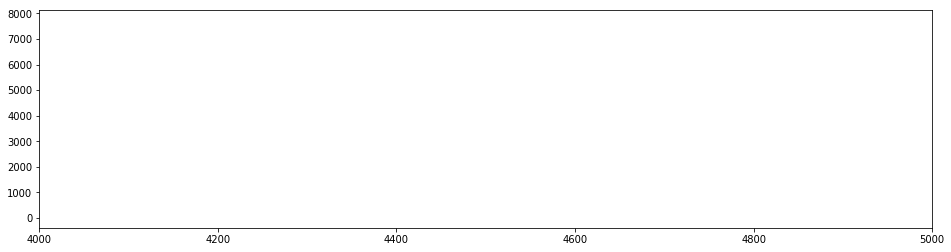

 
../fasta/exon1.fasta
10 archivos


In [10]:
secuencias= []
n=0
for row in lista:
    if row[:1]!="." and row[-3:]=="ab1":
        n+=1
        record = SeqIO.read(row, 'abi')
        record.annotations.keys()
        record.annotations['abif_raw'].keys()
        channels = ['DATA9', 'DATA10', 'DATA11', 'DATA12']
        trace = defaultdict(list)
        for c in channels:
            trace[c] = record.annotations['abif_raw'][c]
        print (str(n)+ ".- Graficando archivo:", row)
        for intervalo in intervalos:
            graficado (intervalo-1000,intervalo)
        print(" ")
        rec1= Trace(row,  trimming=True)
        secuencia = SeqRecord(Seq(rec1.seq,
           IUPAC.unambiguous_dna), id=rec1.id, description=rec1.id)
        secuencias.append(secuencia)
        
# cambiar el nombre del archivo con el que se van a guardar las secuencias en este caso `secuencias_ab1.fasta` y 
# quedara en el mismo directorio, si se desea guardar en otro, se cambia "archivo", p.e. "../fasta/exon1.fasta"
# NOTA: si existe al archivo lo borra!!!!
archivo= "secuencias_ab1.fasta"
print (archivo)
SeqIO.write(secuencias, archivo, "fasta")
print (n, "archivos")
